<a href="https://colab.research.google.com/github/sonsiho/PythonForEngineer/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import thư viện cần thiết

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dữ liệu vào Dataframe

In [ ]:
df=pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Train/train.csv')

# Tiền xử lý dữ liệu

## Kiểm tra dữ liệu trùng

In [ ]:
df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,day,month,year


## Drop dữ liệu trùng

In [ ]:
df.drop_duplicates()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,day,month,year
7980,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,3,1,2015
741,742,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,4,1,2015
740,741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,4,1,2015
739,740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,4,1,2015
1759,1760,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,5,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,1298,CA-2018-115427,2018-12-30,2019-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,94533.0,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,30,12,2018
906,907,CA-2018-143259,2018-12-30,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009.0,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,30,12,2018
645,646,CA-2018-126221,2018-12-30,2019-01-05,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,...,47201.0,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,30,12,2018
908,909,CA-2018-143259,2018-12-30,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009.0,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,30,12,2018


## Kiểm tra dữ liệu có cell null không

In [ ]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

## Xóa dữ liệu trùng Cột Postal Code

In [ ]:
df[df['Postal Code'].isnull()]
df['Postal Code'] = df['Postal Code'].fillna('L7L 0A1')
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
day              0
month            0
year             0
dtype: int64

## Chuẩn hóa dữ liệu ngày tháng cột Order Date và Ship Date

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'],format='%d/%m/%Y')

## Sort lại dữ liệu ngày đặt

In [ ]:
df.sort_values(by=['Order Date'],inplace=True)

## Thêm các cột cần thiết

In [ ]:
order_day = df['Order Date'].dt.day
order_month = df['Order Date'].dt.month
order_year = df['Order Date'].dt.year
month_id = df['Order Date'].dt.strftime("%Y%m")
df['day'] = order_day
df['month'] = order_month
df['year'] = order_year
df['month_id'] = df['month_id'].astype('int')

# Vẽ biểu đồ thể hiện biến động doanh số theo tháng. Cho biết doanh thu trung bình trong 3 tháng gần nhất

## Biểu đồ biến động doanh số theo tháng

In [ ]:
df_revenue_by_month = df[['month_id', 'Sales']].groupby(['month_id']).sum().reset_index()

df_revenue_by_month

,month_id,Sales
0,201501,14205.7070
1,201502,4519.8920
2,201503,55205.7970
3,201504,27906.8550
4,201505,23644.3030
5,201506,34322.9356
6,201507,33781.5430
7,201508,27117.5365
8,201509,81623.5268
9,201510,31453.3930


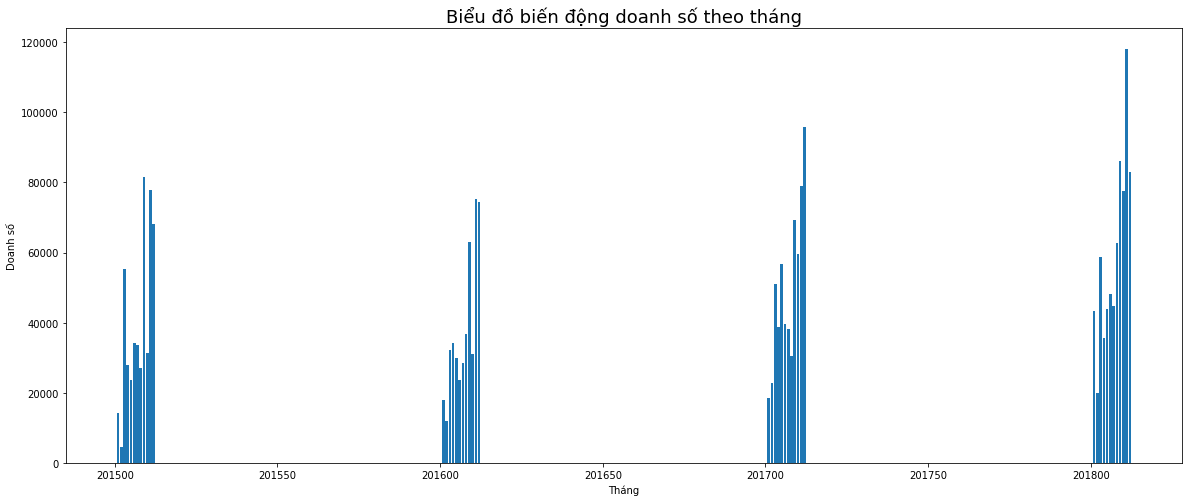

In [ ]:
df_revenue_by_month = df[['month_id', 'Sales']].groupby(['month_id']).sum().reset_index()
x, y = list(df_revenue_by_month['month_id']), list(df_revenue_by_month['Sales'])

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.bar(x, y)
plt.xlabel('Tháng')
plt.ylabel('Doanh số')
plt.title("Biểu đồ biến động doanh số theo tháng", fontsize=18)

plt.show()

In [ ]:
# Sort giảm dần theo ngày đặt
df_by_month = df.sort_values(by=['Order Date'],ascending=False)

df_by_month['month_id'].max()

201812

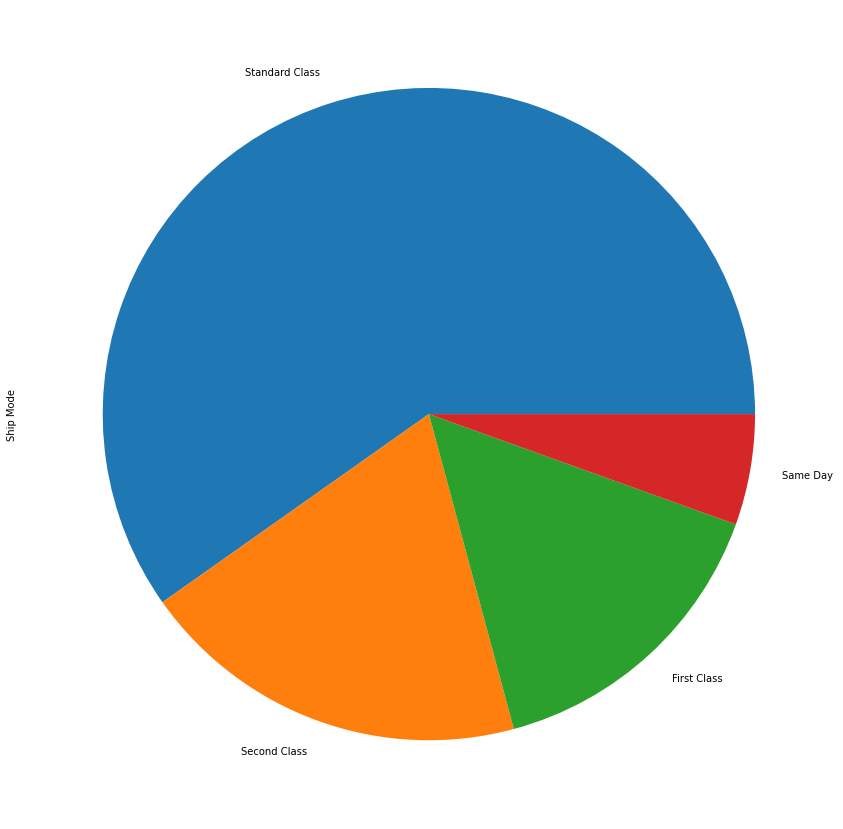

In [ ]:
plt.figure(figsize=(20,15))
df['Ship Mode'].value_counts().plot.pie()

In [ ]:
df['Country'].value_counts()

United States    9800
Name: Country, dtype: int64

In [ ]:
df['City'].value_counts()

New York City      891
Los Angeles        728
Philadelphia       532
San Francisco      500
Seattle            426
                  ... 
San Luis Obispo      1
Manhattan            1
Iowa City            1
Baytown              1
East Orange          1
Name: City, Length: 529, dtype: int64

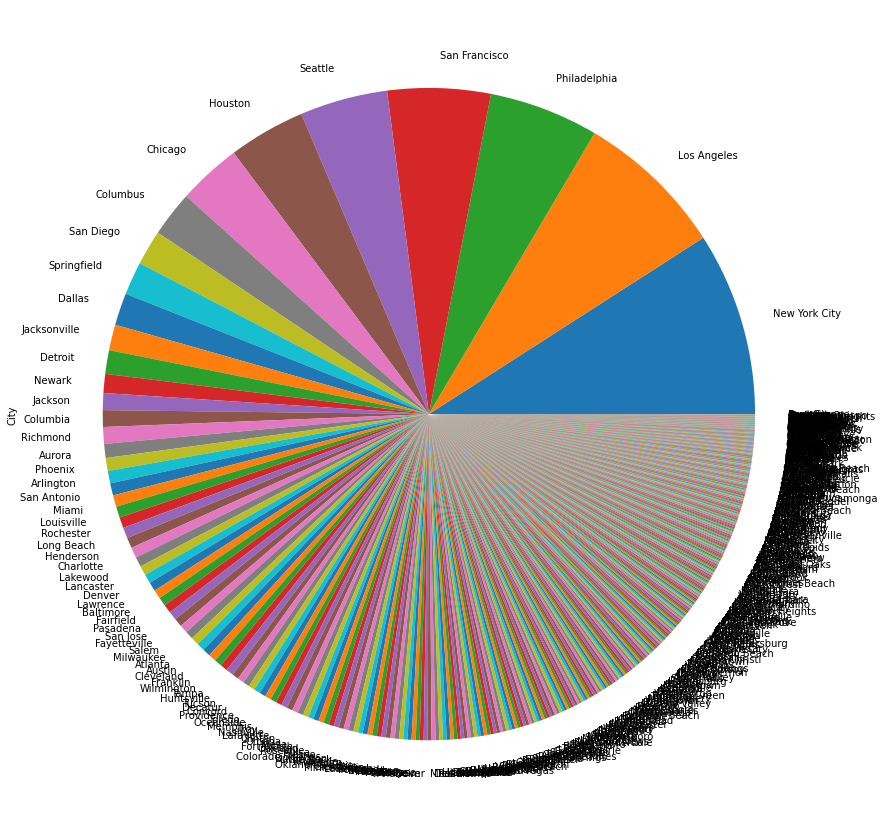

In [ ]:
plt.figure(figsize=(20,15))
df['City'].value_counts().plot.pie()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


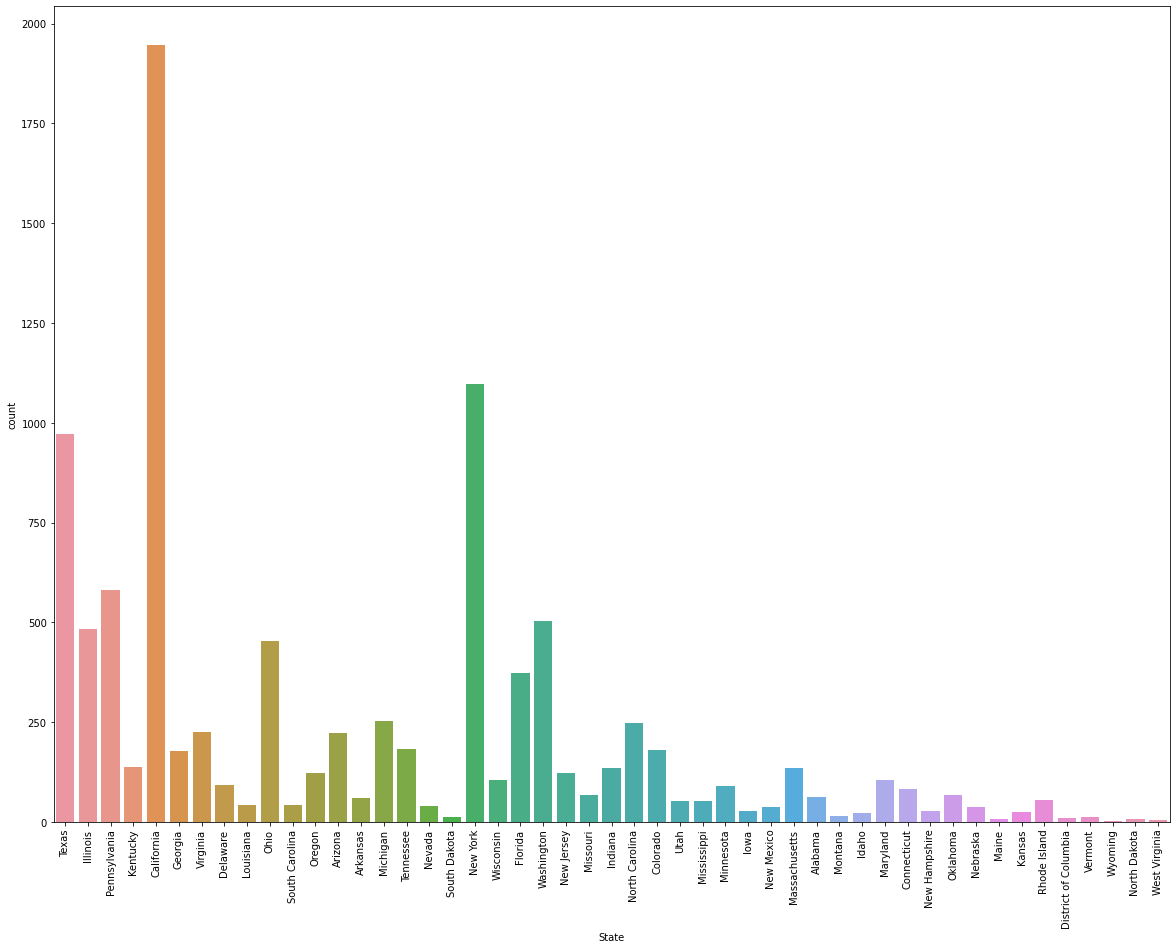

In [ ]:
plt.figure(figsize=(20,15))
plt.xticks(rotation='vertical')
sns.countplot('State',data=df)

In [ ]:
top_states=df.groupby(['State']).sum().sort_values('State',ascending=False).head(10)
top_states=top_states[['Sales']].round(2)
top_states.reset_index(inplace=True)

In [ ]:
top_states

,State,Sales
0,Wyoming,1603.14
1,Wisconsin,31173.43
2,West Virginia,1209.82
3,Washington,135206.85
4,Virginia,70636.72
5,Vermont,8929.37
6,Utah,11220.06
7,Texas,168572.53
8,Tennessee,30661.87
9,South Dakota,1315.56


Text(0, 0.5, 'Revenu')

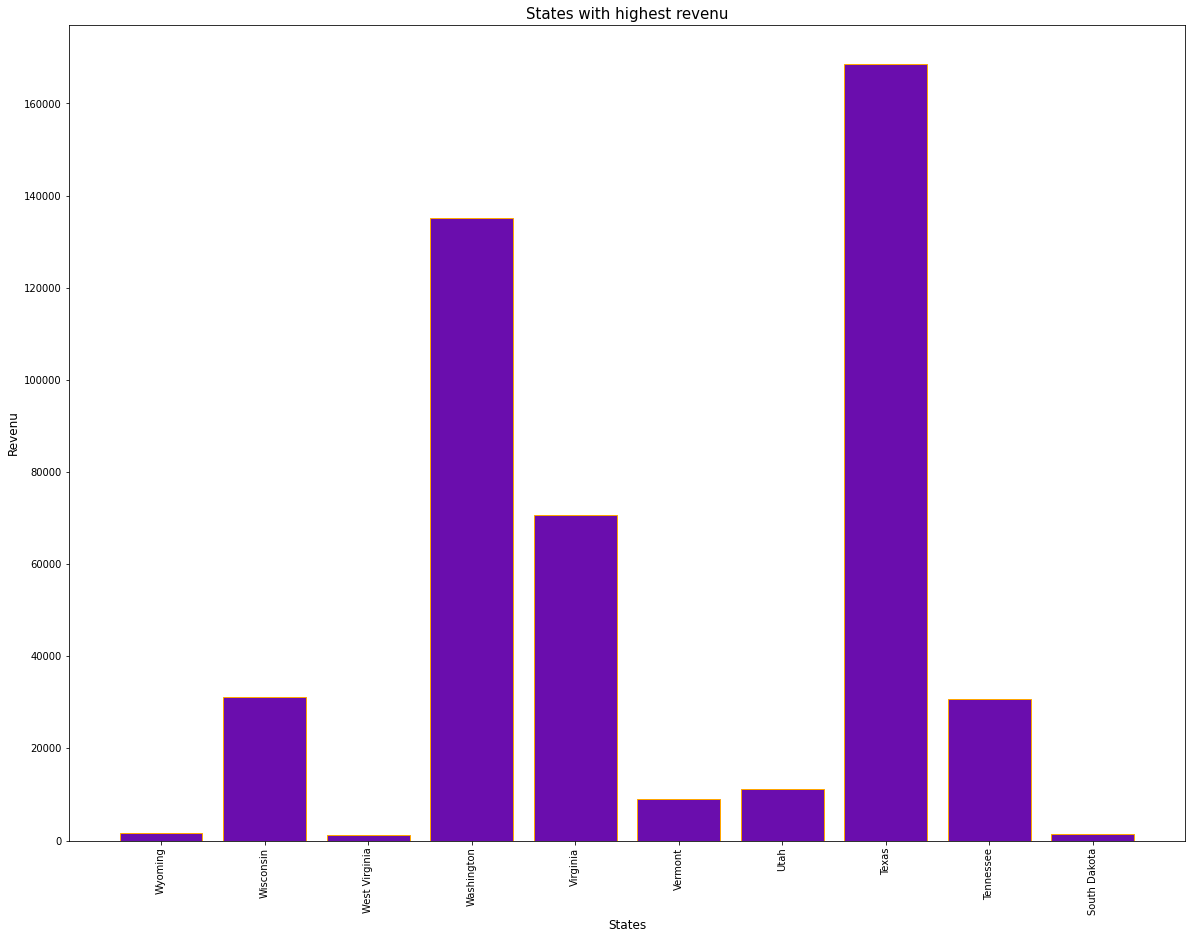

In [ ]:
plt.figure(figsize=(20,15))
plt.bar(top_states['State'],top_states['Sales'],color='#6a0dad',edgecolor='orange')
plt.xticks(rotation='vertical')
plt.title('States with highest revenu',fontsize=15)
plt.xlabel('States',fontsize=12)
plt.ylabel('Revenu',fontsize=12)

In [ ]:
top_cities=df.groupby(['City']).sum().sort_values('Sales',ascending=False).head(10)
top_cities=top_cities[['Sales']].round(2)
top_cities.reset_index(inplace=True)
top_cities

,City,Sales
0,New York City,252462.55
1,Los Angeles,173420.18
2,Seattle,116106.32
3,San Francisco,109041.12
4,Philadelphia,108841.75
5,Houston,63956.14
6,Chicago,47820.13
7,San Diego,47521.03
8,Jacksonville,44713.18
9,Detroit,42446.94


Text(0, 0.5, 'Revenu')

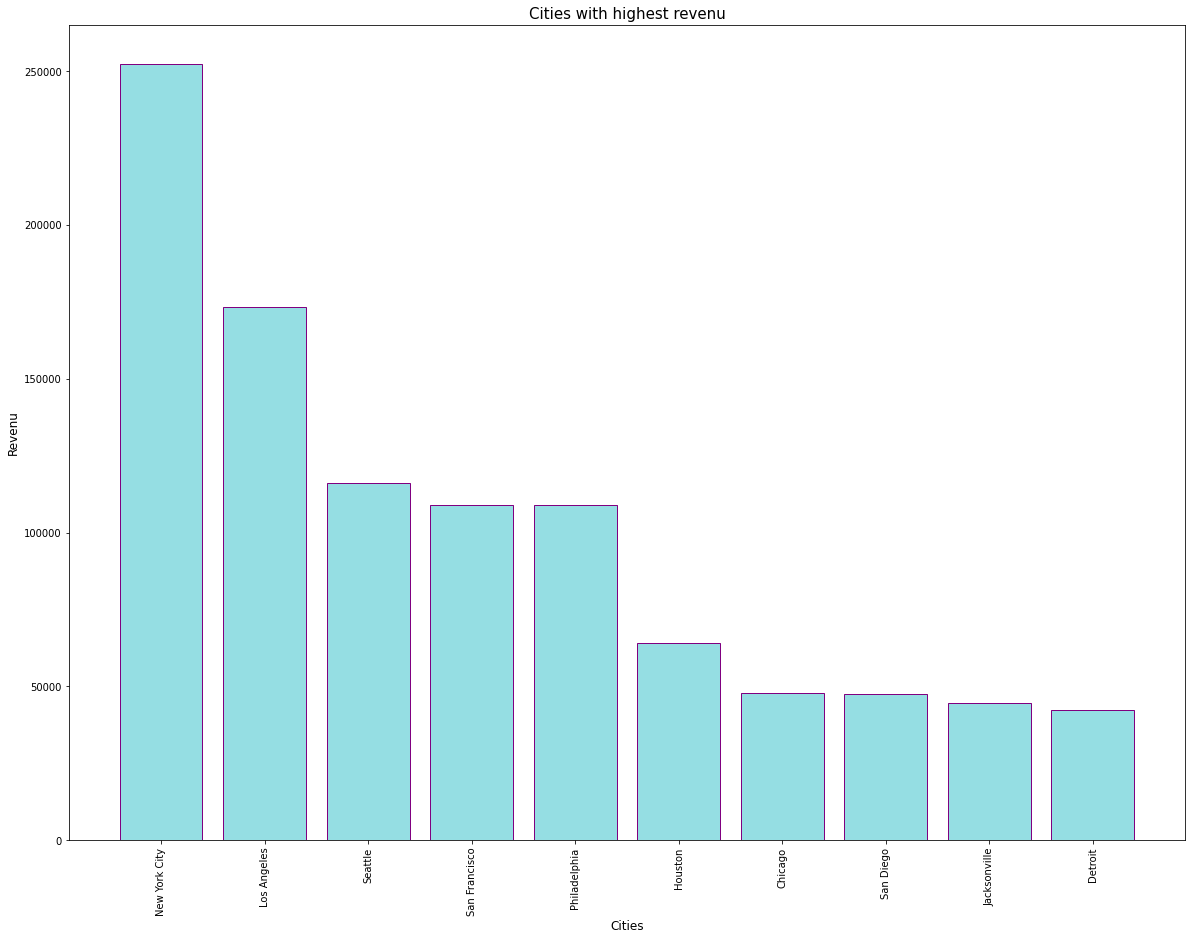

In [ ]:
plt.figure(figsize=(20,15))
plt.bar(top_cities['City'],top_cities['Sales'],color='#95dee3',edgecolor='purple')
plt.xticks(rotation='vertical')
plt.title('Cities with highest revenu',fontsize=15)
plt.xlabel('Cities',fontsize=12)
plt.ylabel('Revenu',fontsize=12)

In [ ]:
top_customers=df.groupby(['Customer Name']).sum().sort_values('Sales',ascending=False).head(10)
top_customers=top_customers[['Sales']].round(2)
top_customers.reset_index(inplace=True)
top_customers

,Customer Name,Sales
0,Sean Miller,25043.05
1,Tamara Chand,19052.22
2,Raymond Buch,15117.34
3,Tom Ashbrook,14595.62
4,Adrian Barton,14473.57
5,Ken Lonsdale,14175.23
6,Sanjit Chand,14142.33
7,Hunter Lopez,12873.30
8,Sanjit Engle,12209.44
9,Christopher Conant,12129.07


Text(0, 0.5, 'Revenu')

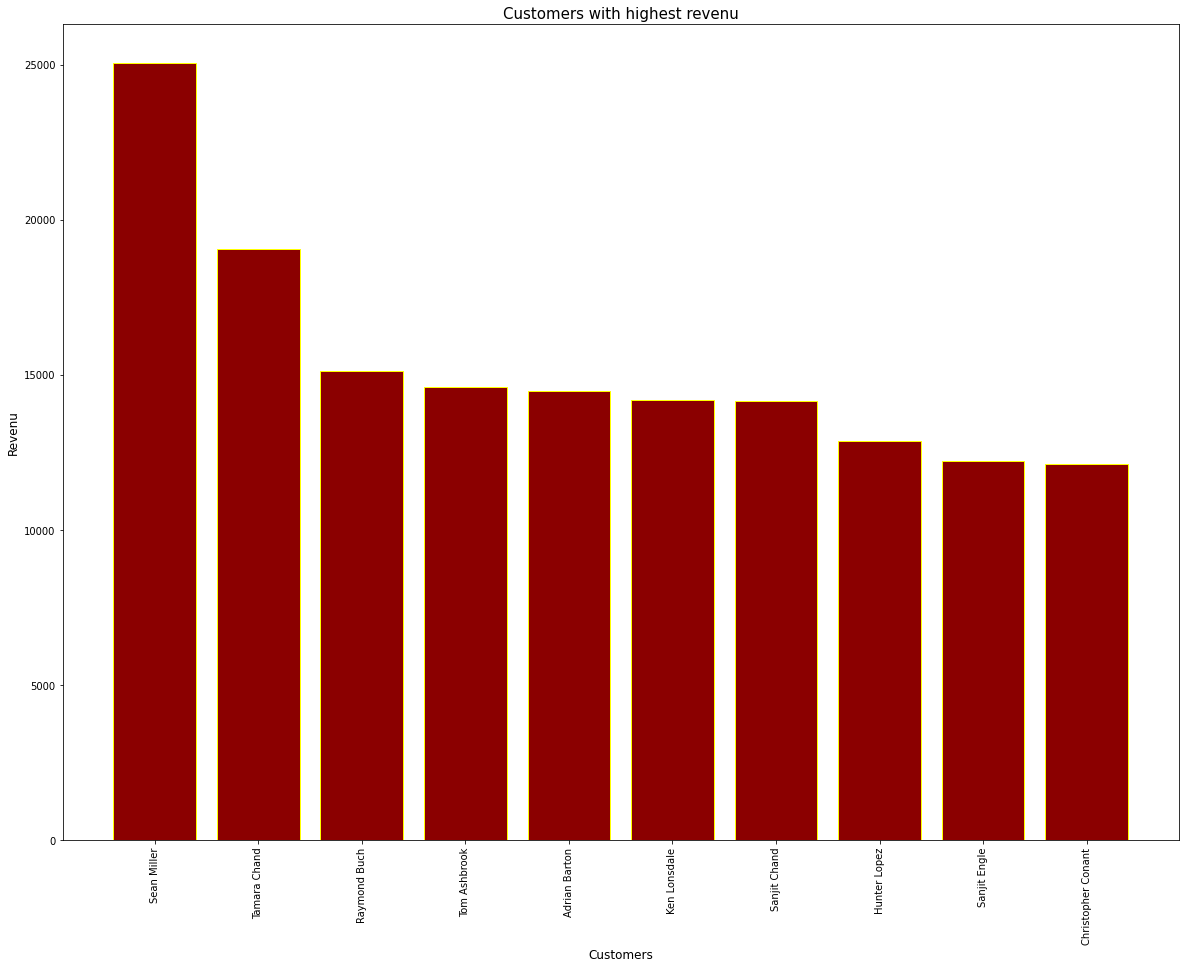

In [ ]:
plt.figure(figsize=(20,15))
plt.bar(top_customers['Customer Name'],top_customers['Sales'],color='#8b0000',edgecolor='yellow')
plt.xticks(rotation='vertical')
plt.title('Customers with highest revenu',fontsize=15)
plt.xlabel('Customers',fontsize=12)
plt.ylabel('Revenu',fontsize=12)

In [ ]:
top_products=df.groupby(['Product Name']).sum().sort_values('Sales',ascending=False).head(5)
top_products=top_products[['Sales']].round(2)
top_products.reset_index(inplace=True)
top_products

,Product Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,61599.82
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38
2,Cisco TelePresence System EX90 Videoconferenci...,22638.48
3,HON 5400 Series Task Chairs for Big and Tall,21870.58
4,GBC DocuBind TL300 Electric Binding System,19823.48


Text(0, 0.5, 'Revenu')

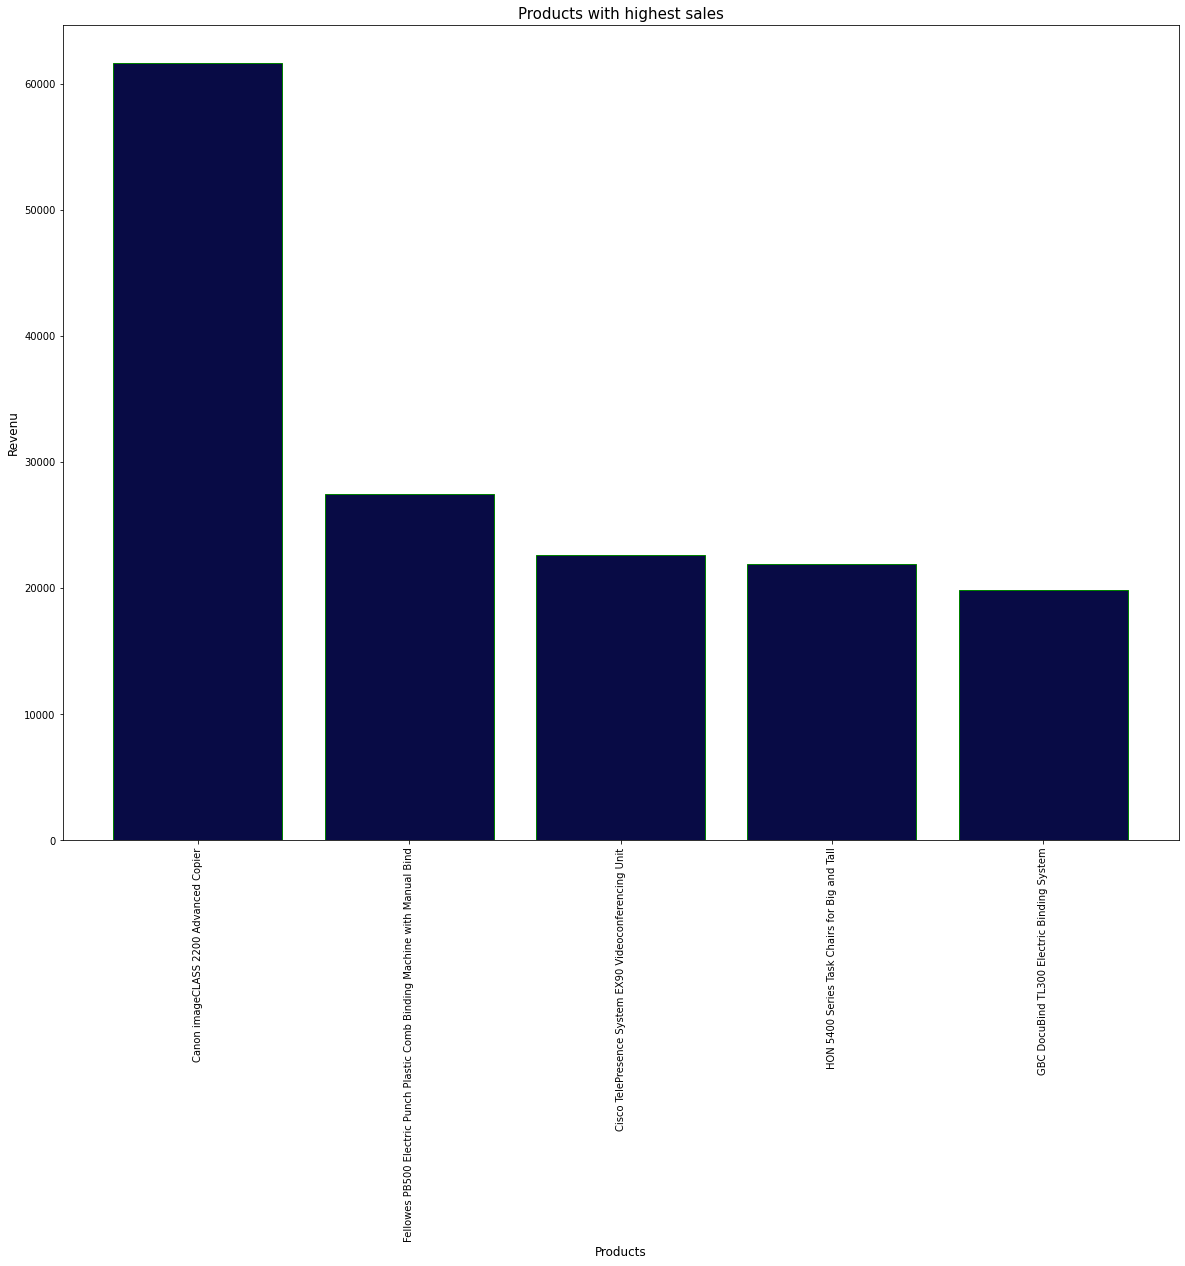

In [ ]:
plt.figure(figsize=(20,15))
plt.bar(top_products['Product Name'],top_products['Sales'],color='#080b45',edgecolor='green')
plt.xticks(rotation='vertical')
plt.title('Products with highest sales',fontsize=15)
plt.xlabel('Products',fontsize=12)
plt.ylabel('Revenu',fontsize=12)

In [ ]:
df['day'] = df['Order Date'].dt.day
df['month'] = df['Order Date'].dt.month
df['year'] = df['Order Date'].dt.year

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,day,month,year
7980,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,3,1,2015
741,742,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,4,1,2015
740,741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,4,1,2015
739,740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,4,1,2015
1759,1760,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,5,1,2015


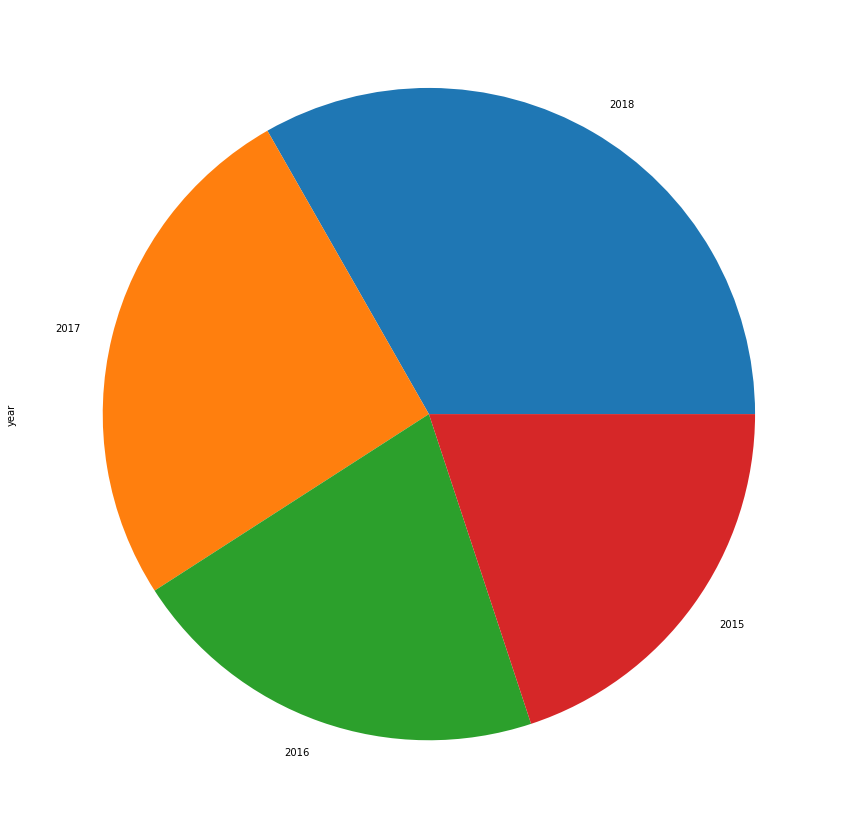

In [ ]:
plt.figure(figsize=(20,15))
df['year'].value_counts().plot.pie()

In [ ]:
year_sales = df.groupby(['year']).sum().sort_values('Sales',ascending=False).head(5)
year_sales.reset_index(inplace=True)
year_sales

,year,Row ID,Sales,day,month
0,2018,16313767,722052.0192,50088,25286
1,2017,12254092,600192.5500,38533,19606
2,2015,9508700,479856.2081,30706,15351
3,2016,9948341,459436.0054,32444,16378


In [ ]:
sales_2018 = df[df['year']==2018]
sales_2018.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,day,month,year
8072,8073,CA-2018-151750,2018-01-01,2018-01-05,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,77340.0,Central,OFF-AR-10003158,Office Supplies,Art,Fluorescent Highlighters by Dixon,12.736,1,1,2018
8071,8072,CA-2018-151750,2018-01-01,2018-01-05,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,77340.0,Central,FUR-CH-10003199,Furniture,Chairs,Office Star - Contemporary Task Swivel Chair,310.744,1,1,2018
8073,8074,CA-2018-151750,2018-01-01,2018-01-05,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,77340.0,Central,OFF-BI-10000301,Office Supplies,Binders,GBC Instant Report Kit,6.470,1,1,2018
8074,8075,CA-2018-151750,2018-01-01,2018-01-05,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,77340.0,Central,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",13.748,1,1,2018
6682,6683,CA-2018-154466,2018-01-01,2018-01-02,First Class,DP-13390,Dennis Pardue,Home Office,United States,Franklin,...,53132.0,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,1,1,2018


In [ ]:
sales = df.groupby(['month']).sum().sort_values('Sales',ascending=False).head(5)
sales.reset_index(inplace=True)
sales

,month,Row ID,Sales,day,year
0,11,7108744,350161.7110,22062,2922156
1,12,6662904,321480.1695,20248,2787094
2,9,6712426,300103.4117,20029,2730652
3,10,3945431,199496.2947,12933,1631565
4,3,3517923,197573.5872,10870,1371361
